In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [2]:
path = os.path.dirname(os.path.abspath('__file__'))+'\\Prepared_tables\\'
path_saving = os.path.dirname(os.path.abspath('__file__'))+'\\raw_figures'

df_sites = pd.read_csv(path + 'Prep_STYsites_cut0_all.csv', low_memory=False)


df_prot = pd.read_csv(path + 'Prep_Protein Groups_cut0_notimuted.csv', low_memory=False)
df_prot['SubMitoLocalization'] = df_prot['SubMitoLocalization'].astype(str)
df_prot['IMPI_new'] = df_prot['IMPI_new'].astype(str)
df_prot['Mito_filt'] = ['Mitochondrial' if (df_prot['SubMitoLocalization'][i]!='nan' or('Verified mitochondrial' in df_prot['IMPI_new'][i])==True) else 'Not Mitochondrial' for i in range(len(df_prot))]

In [3]:
counter = 0
ID_all_class_one_phos = []
#ID_Mito = []
ID_Mito_ClassI = []
ID_Mito_Quant = []
for T in ['B','BAT','H','K','L','S','SKM']:
    
    Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']
    
    col = []
    Tab = pd.DataFrame()
    [col.append(i) for i in range(len(list(df_sites.columns))) if ((df_sites.columns[i].find('Intensity wt')==0)&(df_sites.columns[i].find('_'+T)==(len(df_sites.columns[i])-len(T)-1)))==True]
    Tab['Count'] = df_sites.iloc[:,col].count(1)
    Tab['Norm_Int'] = df_sites.iloc[:,col].median(1)
    Tab['SubMitoLocalization'] = df_sites['SubMitoLocalization']
    Tab['IMPI_new'] = df_sites['IMPI_new']
    Tab['Proteins'] = df_sites['Proteins']
    Tab['Localization prob'] = df_sites['Localization prob']
    Tab = Tab[Tab['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
    Tab2 = Tab[Tab['Count']>2].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True)
    
    #all_phos = len(Tab)
    all_class_one_phos = len(Tab[Tab['Localization prob'] >= 0.75])
    #all_class_one = sum(Tab['Localization prob']>=0.75)
    #Tab = Tab[Tab['Localization prob']>=0.75].reset_index(drop= True)
    mito = len([i for i in range(len(Tab)) if (('Verified mitochondrial' in Tab['IMPI_new'][i])==True or 
                                                         #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True or 
                                                         Tab['SubMitoLocalization'][i]!='[]')])

    Tab = Tab.iloc[[i for i in range(len(Tab)) if (('Verified mitochondrial' in Tab['IMPI_new'][i])==True or 
                                                         #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True or 
                                                         Tab['SubMitoLocalization'][i]!='[]')]].reset_index(drop= True)
    Mito_class_one = sum(Tab['Localization prob']>=0.75)
    Tab2 = Tab2[Tab2['Localization prob']>=0.75].reset_index(drop= True)
    mito_quant = len([i for i in range(len(Tab2)) if (('Verified mitochondrial' in Tab2['IMPI_new'][i])==True or 
                                                         #('Predicted mitochondrial' in Tab2['IMPI_new'][i])==True or 
                                                         Tab2['SubMitoLocalization'][i]!='[]')])
    ID_all_class_one_phos.append(all_class_one_phos)
    #ID_all.append(all_phos[all_phos['Localization prob'] >= 0.75])
    #ID_Mito.append(mito)
    ID_Mito_ClassI.append(Mito_class_one)
    ID_Mito_Quant.append(mito_quant)

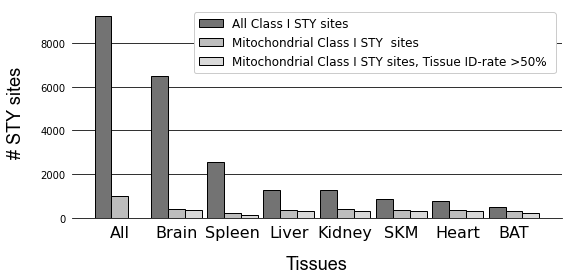

In [4]:

#ID_all.append(len(df_sites))
ID_all_class_one_phos.append(len(df_sites[df_sites['Localization prob'] >= 0.75]))

mito = df_sites.iloc[[i for i in range(len(df_sites)) if (('Verified mitochondrial' in df_sites['IMPI_new'][i])==True or 
                                                         #('Predicted mitochondrial' in df_sites['IMPI_new'][i])==True or 
                                                         df_sites['SubMitoLocalization'][i]!='[]')]]
#ID_Mito.append(len(mito))

ID_Mito_ClassI.append(len(mito[mito['Localization prob'] >= 0.75]))
ID_Mito_Quant.append(0)



Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM','All']
#site_dict = {Tissues[i]:{'ID_all':ID_all[i],'ID_Mito':ID_Mito[i],'ID_Mito_ClassI':ID_Mito_ClassI[i],'ID_Mito_Quant':ID_Mito_Quant[i]} for i in range(len(Tissues))}
site_dict = {Tissues[i]:{'ID_all_class_one_phos':ID_all_class_one_phos[i],'ID_Mito_ClassI':ID_Mito_ClassI[i],'ID_Mito_Quant':ID_Mito_Quant[i]} for i in range(len(Tissues))}
#site_dict_sorted = {sorted(site_dict.items(), key=lambda k_v: k_v[1]['ID_all'], reverse = True)[i][0]:sorted(site_dict.items(), key=lambda k_v: k_v[1]['ID_all'], reverse = True)[i][1] for i in range(len(site_dict))}
site_dict_sorted = {sorted(site_dict.items(), key=lambda k_v: k_v[1]['ID_all_class_one_phos'], reverse = True)[i][0]:sorted(site_dict.items(), key=lambda k_v: k_v[1]['ID_all_class_one_phos'], reverse = True)[i][1] for i in range(len(site_dict))}

site_dict_sorted = {'All':site_dict_sorted['All'],
                       'Brain':site_dict_sorted['Brain'],
                       'Spleen':site_dict_sorted['Spleen'],
                       'Liver':site_dict_sorted['Liver'],
                       'Kidney':site_dict_sorted['Kidney'],
                       'SKM':site_dict_sorted['SKM'],
                       'Heart':site_dict_sorted['Heart'],
                       'BAT':site_dict_sorted['BAT']
                      }



fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(Tissues))
bar_width = 0.3

#temp = "ID_all"
#res = [val[temp] for key, val in site_dict_sorted.items() if temp in val]
#b1 = ax.bar(x, res,width=bar_width, label='All STY sites', color = '#737373', ec = 'black')
temp = "ID_all_class_one_phos"
res = [val[temp] for key, val in site_dict_sorted.items() if temp in val]
b1 = ax.bar(x, res,width=bar_width, label='All Class I STY sites', color = '#737373', ec = 'black')
#temp = "ID_Mito"
#res = [val[temp] for key, val in site_dict_sorted.items() if temp in val]
#b2 = ax.bar(x+bar_width, res,width=bar_width, label='Mitochondrial sites', color = '#969696', ec = 'black')
temp = "ID_Mito_ClassI"
res = [val[temp] for key, val in site_dict_sorted.items() if temp in val]
b3 = ax.bar(x+bar_width, res,width=bar_width, label='Mitochondrial Class I STY  sites', color = '#bdbdbd', ec = 'black')
temp = "ID_Mito_Quant"
res = [val[temp] for key, val in site_dict_sorted.items() if temp in val]
b4 = ax.bar(x+2*bar_width, res,width=bar_width, label='Mitochondrial Class I STY sites, Tissue ID-rate >50% ', color = '#d9d9d9', ec = 'black')

#ax.set_xticks(x + bar_width*1.5)
#ax.set_xticklabels(list(site_dict_sorted.keys()), size = 16)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(list(site_dict_sorted.keys()), size = 16)


ax.legend(fontsize = 'large', facecolor='white', framealpha = 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='black')
#ax.xaxis.grid(False)

ax.set_xlabel('Tissues', labelpad=15,size = 18,family='Arial')
ax.set_ylabel('# STY sites', labelpad=15,size = 18,family='Arial')
ax.set_title('', pad=15)
ax.set_facecolor("white")
 
fig.tight_layout()

fig.savefig(path_saving+'\\Figure_5\\STYsites_new.pdf', bbox_inches = "tight")


In [5]:
site_dict_sorted

{'All': {'ID_all_class_one_phos': 9224,
  'ID_Mito_ClassI': 991,
  'ID_Mito_Quant': 0},
 'Brain': {'ID_all_class_one_phos': 6507,
  'ID_Mito_ClassI': 412,
  'ID_Mito_Quant': 352},
 'Spleen': {'ID_all_class_one_phos': 2541,
  'ID_Mito_ClassI': 202,
  'ID_Mito_Quant': 125},
 'Liver': {'ID_all_class_one_phos': 1279,
  'ID_Mito_ClassI': 358,
  'ID_Mito_Quant': 295},
 'Kidney': {'ID_all_class_one_phos': 1271,
  'ID_Mito_ClassI': 395,
  'ID_Mito_Quant': 316},
 'SKM': {'ID_all_class_one_phos': 849,
  'ID_Mito_ClassI': 374,
  'ID_Mito_Quant': 298},
 'Heart': {'ID_all_class_one_phos': 771,
  'ID_Mito_ClassI': 347,
  'ID_Mito_Quant': 289},
 'BAT': {'ID_all_class_one_phos': 517,
  'ID_Mito_ClassI': 295,
  'ID_Mito_Quant': 219}}

In [6]:
counter = 0
fig_row = 0
fig_col = 0
ID_all = []
ID_Mito = []
ID_Mito_quant = []
for T in ['B_','BAT_','H_','K_','L_','S_','SKM_']:
    
    Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']
    col = []
    Tab = pd.DataFrame()
    [col.append(i) for i in range(len(list(df_prot.columns))) if df_prot.columns[i].find('Norm_Intensity '+T)==0]
    Tab['Count'] = df_prot.iloc[:,col].count(1)
    Tab['Norm_Int'] = df_prot.iloc[:,col].median(1)
    Tab['GO_CC'] = df_prot['GO_CC']
    Tab['SubMitoLocalization'] = df_prot['SubMitoLocalization']
    Tab['IMPI_new'] = df_prot['IMPI_new']
    
    Tab = Tab[Tab['Count']>0].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True).reset_index()
    Tab['Mito_filt'] = ['Mitochondrial' if (Tab['SubMitoLocalization'][i]!='nan' or('Verified mitochondrial' in Tab['IMPI_new'][i])==True) else 'Not Mitochondrial' for i in range(len(Tab))]
                                            #or ('Predicted mitochondrial' in Tab['IMPI_new'][i])==True) 
                                            #else 'Not Mitochondrial' for i in range(len(Tab)))]
    #Tab_2 = Tab[Tab['Mito_filt']=='Not Mitochondrial'].reset_index(drop=True).reset_index()
    #Tab_2['Membrane'] = ['Membrane' if (('synapse [GO:0045202]' in Tab_2['GO_CC'][i])==True) #or 
    #                                    #('membrane [GO:0016020]' in Tab_2['GO_CC'][i])==True or
    #                                            #('plasma membrane [GO:0005886]' in Tab_2['GO_CC'][i])==True) 
    #                        else 'Not Membrane' for i in range(len(Tab_2))]
    Tab_quant = Tab[Tab['Count']>2].sort_values(by=['Norm_Int'],ascending= False).reset_index(drop= True).reset_index()
    Tab_quant['Mito_filt'] = ['Mitochondrial' if (Tab_quant['SubMitoLocalization'][i]!='nan' or('Verified mitochondrial' in Tab_quant['IMPI_new'][i])==True)
                                                  #or ('Predicted mitochondrial' in Tab_quant['IMPI_new'][i])==True) 
                                                  else 'Not Mitochondrial' for i in range(len(Tab_quant))]
    
    
    Tab['Norm_Int_raw'] =  np.power(2,Tab['Norm_Int'])
    Int_all = Tab['Norm_Int_raw'].sum()
    Int_Mito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]!='nan' or
                                                                         ('Verified mitochondrial' in Tab['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True)])
    Int_NonMito = sum([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]=='nan' and
                                                                            ('Verified mitochondrial' in Tab['IMPI_new'][i])!=True )])
                                                                            #and ('Predicted mitochondrial' in Tab['IMPI_new'][i])!=True)])
    
    
    ID_Num_all = len(Tab['Norm_Int_raw'])
    ID_Num_Mito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]!='nan' or
                                                                         ('Verified mitochondrial' in Tab['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab['IMPI_new'][i])==True)])
    ID_Num_NonMito = len([Tab['Norm_Int_raw'][i]  for i in range(len(Tab)) if (Tab['SubMitoLocalization'][i]=='nan' and
                                                                            ('Verified mitochondrial' in Tab['IMPI_new'][i])!=True )])
                                                                            #and ('Predicted mitochondrial' in Tab['IMPI_new'][i])!=True)])
    
    Tab_quant['Norm_Int_raw'] =  np.power(2,Tab_quant['Norm_Int'])
    ID_Num_Mito_quant = len([Tab_quant['Norm_Int_raw'][i]  for i in range(len(Tab_quant)) if (Tab_quant['SubMitoLocalization'][i]!='nan' or
                                                                         ('Verified mitochondrial' in Tab_quant['IMPI_new'][i])==True)])# or 
                                                                         #('Predicted mitochondrial' in Tab_quant['IMPI_new'][i])==True)])    

    ID_perc_Mito = ID_Num_Mito/ID_Num_all*100
    ID_perc_NonMito = ID_Num_NonMito/ID_Num_all*100
    
    Int_perc_Mito = Int_Mito/Int_all*100
    Int_perc_NonMito = Int_NonMito/Int_all*100

    
    
    ID_all.append(ID_Num_all) 
    ID_Mito.append(ID_Num_Mito) 
    ID_Mito_quant.append(ID_Num_Mito_quant) 

    counter = counter+1

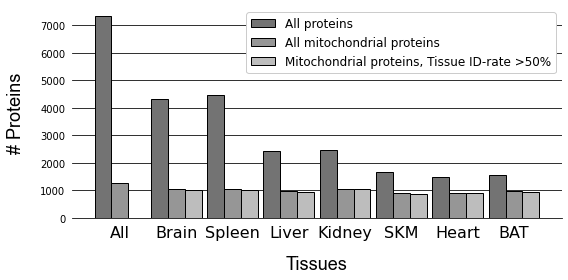

In [7]:
ID_all.append(len(df_prot)) 
ID_Mito.append(len(df_prot[df_prot['Mito_filt'] == "Mitochondrial"])) 
ID_Mito_quant.append(0)

Tissues = ['Brain','BAT','Heart', 'Kidney', 'Liver', 'Spleen', 'SKM', 'All']
protein_dict = {Tissues[i]:{'ID_all':ID_all[i],'ID_Mito':ID_Mito[i],'ID_Mito_quant':ID_Mito_quant[i]} for i in range(len(Tissues) )}
protein_dict_sorted = {sorted(protein_dict.items(), key=lambda k_v: k_v[1]['ID_all'], reverse = True)[i][0]:sorted(protein_dict.items(), key=lambda k_v: k_v[1]['ID_all'], reverse = True)[i][1] for i in range(len(protein_dict))}

protein_dict_sorted = {'All':protein_dict_sorted['All'],
                       'Brain':protein_dict_sorted['Brain'],
                       'Spleen':protein_dict_sorted['Spleen'],
                       'Liver':protein_dict_sorted['Liver'],
                       'Kidney':protein_dict_sorted['Kidney'],
                       'SKM':protein_dict_sorted['SKM'],
                       'Heart':protein_dict_sorted['Heart'],
                       'BAT':protein_dict_sorted['BAT']
                      }

fig, ax = plt.subplots(figsize=(8, 4))
x = np.arange(len(Tissues))
bar_width = 0.3

temp = "ID_all"
res = [val[temp] for key, val in protein_dict_sorted.items() if temp in val]
b1 = ax.bar(x, res,width=bar_width, label='All proteins', color = '#737373', ec = 'black')
temp = "ID_Mito"
res = [val[temp] for key, val in protein_dict_sorted.items() if temp in val]
b2 = ax.bar(x+bar_width, res,width=bar_width, label='All mitochondrial proteins', color = '#969696', ec = 'black')
temp = "ID_Mito_quant"
res = [val[temp] for key, val in protein_dict_sorted.items() if temp in val]
b3 = ax.bar(x+2*bar_width, res,width=bar_width, label='Mitochondrial proteins, Tissue ID-rate >50%', color = '#bdbdbd', ec = 'black')

ax.set_xticks(x + bar_width)
ax.set_xticklabels(list(protein_dict_sorted.keys()), size = 16)

ax.legend(fontsize = 'large', facecolor='white', framealpha = 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='black')
#ax.xaxis.grid(False)

ax.set_xlabel('Tissues', labelpad=15,size = 18,family='Arial')
ax.set_ylabel('# Proteins', labelpad=15,size = 18,family='Arial')
ax.set_title('', pad=15)
ax.set_facecolor("white")
 
fig.tight_layout()
fig.savefig(path_saving+'\\Figure_1\\Proteins.pdf', bbox_inches = "tight")


In [8]:
protein_dict_sorted

{'All': {'ID_all': 7322, 'ID_Mito': 1266, 'ID_Mito_quant': 0},
 'Brain': {'ID_all': 4329, 'ID_Mito': 1043, 'ID_Mito_quant': 1021},
 'Spleen': {'ID_all': 4476, 'ID_Mito': 1061, 'ID_Mito_quant': 1016},
 'Liver': {'ID_all': 2425, 'ID_Mito': 972, 'ID_Mito_quant': 954},
 'Kidney': {'ID_all': 2449, 'ID_Mito': 1047, 'ID_Mito_quant': 1036},
 'SKM': {'ID_all': 1662, 'ID_Mito': 913, 'ID_Mito_quant': 878},
 'Heart': {'ID_all': 1489, 'ID_Mito': 909, 'ID_Mito_quant': 886},
 'BAT': {'ID_all': 1559, 'ID_Mito': 958, 'ID_Mito_quant': 935}}